# Load data
- Trước tiên, ta import các thư viện cần thiết và đặt một số đường dẫn đến thư mục, file làm việc
- Sử dụng pandas để load file csv
- Chúng ta load và quan sát tất cả các file train, test, attributes và product_descriptions

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib_venn import venn2
import regex as re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_ROOT_DIR="/content/drive/MyDrive/BTL_ML"
!ls $DATA_ROOT_DIR

In [4]:
TRAIN_PATH="/content/drive/MyDrive/BTL_ML/train.csv"
TEST_PATH="/content/drive/MyDrive/BTL_ML/test.csv"
ATT_PATH="/content/drive/MyDrive/BTL_ML/attributes.csv"
DESC_PATH="/content/drive/MyDrive/BTL_ML/product_descriptions.csv"
MERGE_DATA_PATH="/content/drive/MyDrive/BTL_ML/mergeData.csv"

In [5]:
train_df = pd.read_csv(TRAIN_PATH, encoding='iso-8859-1')
test_df = pd.read_csv(TEST_PATH,encoding='iso-8859-1')

print(train_df.shape)
print(test_df.shape)

train_df.head()

(74067, 5)
(166693, 4)


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             166693 non-null  int64 
 1   product_uid    166693 non-null  int64 
 2   product_title  166693 non-null  object
 3   search_term    166693 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB


In [8]:
test_df.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [9]:
attr_df = pd.read_csv(ATT_PATH, encoding='iso-8859-1')
attr_df.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [10]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044803 entries, 0 to 2044802
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   product_uid  float64
 1   name         object 
 2   value        object 
dtypes: float64(1), object(2)
memory usage: 46.8+ MB


In [11]:
desc_df = pd.read_csv(DESC_PATH, encoding='iso-8859-1')
desc_df.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [12]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_uid          124428 non-null  int64 
 1   product_description  124428 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [13]:
# Check null value
train_df.isna().sum()

id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

# Phân tích dữ liệu
Trong phần này, em thực hiện phân tích dự liệu thông qua một số thống kê, bảng biểu để hiểu rõ hơn về dữ liệu, từ đó đưa ra các nhận xét để xử lý dữ liệu.

Các dữ liệu được phân tích lần lượt: 
- Cột relevance score
- Sản phẩm (liên quan tới product_uid)
- Các dữ liệu trong tệp về attributes
- Dữ liệu description của các sản phẩm

**Relevance Score**

Đây chính là trường thông tin model của chúng ta cần đưa ra cho tập test.

Chúng ta thực hiện một số thống kê, phân tích trường thông tin này ở tập train bao gồm:
- Đếm tần suất xuất hiện của các giá trị 
- Vẽ biểu đồ tương ứng


In [ ]:
# count value from 1 - 3
train_df['relevance'].value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

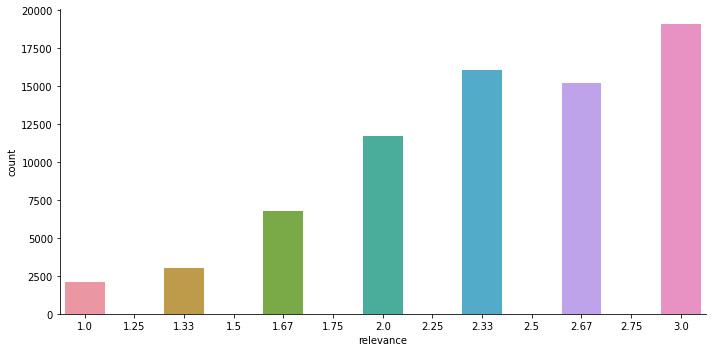

In [ ]:
# relevance chart
sns.catplot(x='relevance', kind='count', data=train_df, height=5, aspect=2)
plt.show()

**Product**

Phân tích dữ liệu về các mặt hàng, sản phẩm, bao gồm:
- Tìm khoảng số lần xuất hiện của một sản phẩm trong tập train
- Đếm số lượng sản phẩm (unique) ở tập train 
- Quan sát sự trùng lặp về sản phẩm giữa tập train và test

In [ ]:
product_counts=train_df['product_uid'].value_counts()
print('max product count', max(product_counts))
print('min product count', min(product_counts))
print('Number of unique products', len(product_counts))

max product count 21
min product count 1
Number of unique products 54667


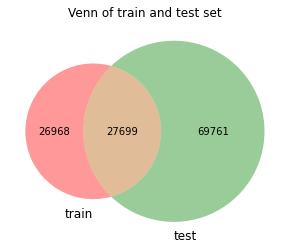

In [ ]:
# Venn chart for train set and test set
trainVenn = set(train_df['product_uid'].values)
testVenn = set(test_df['product_uid'].values)
venn2([trainVenn, testVenn], ('train', 'test'))
plt.title('Venn of train and test set')
plt.show()

**Attributes**

Phân tích dữ liệu trong file attributes.csv:
- Số thuộc tính mà mỗi sản phẩm có thông tin bổ sung trong bảng attributes
- Mối quan hệ giữa tập train và dữ liệu từ bảng về attributes (so sánh sự trùng lặp về product_uid)
- Quan sát các loại thuộc tính có tần suất xuất hiện lớn (top 30)

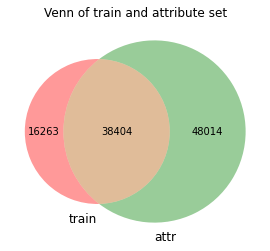

In [ ]:
# Venn chart for train set and attribute set
trainVenn = set(train_df['product_uid'].values)
attrVenn = set(attr_df['product_uid'].values)

venn2([trainVenn, attrVenn], ('train', 'attr'))
plt.title('Venn of train and attribute set')
plt.show()

In [ ]:
#distibution of attributes for each product 
grp_df = attr_df.groupby(['product_uid'])
print('max attributes for one product', grp_df.count()['value'].max())
print('min attributes for one product', grp_df.count()['value'].min())

max attributes for one product 88
min attributes for one product 5


In [ ]:
list_train_product_ids = train_df['product_uid'].values
tmp = attr_df.loc[attr_df['product_uid'].isin(list_train_product_ids)]  
tmp.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [ ]:
attr_df.shape

(2044803, 3)

In [ ]:
tmp.shape

(932000, 3)

In [ ]:
#top 30 most common attribute_names
attr_df['name'].value_counts().head(30)

MFG Brand Name                 86250
Bullet02                       86248
Bullet03                       86226
Bullet04                       86174
Bullet01                       85940
Product Width (in.)            61137
Bullet05                       60529
Product Height (in.)           54698
Product Depth (in.)            53652
Product Weight (lb.)           45175
Bullet06                       44901
Color Family                   41508
Bullet07                       34349
Material                       31500
Color/Finish                   28564
Bullet08                       26645
Certifications and Listings    24583
Bullet09                       20567
Assembled Height (in.)         18299
Assembled Width (in.)          18263
Assembled Depth (in.)          18198
Product Length (in.)           16705
Bullet10                       14763
Indoor/Outdoor                 12939
Bullet11                       11784
Commercial / Residential        9530
Bullet12                        8795
E

**Description**

Phân tích dữ liệu về file product_description:
- Mối quan hệ giữa tập train và dữ liệu trong bảng descriptions (so sánh sự trùng lặp về product_uid)
- Quan sát một vài bản ghi để nhìn nhận về đặc điểm dữ liệu

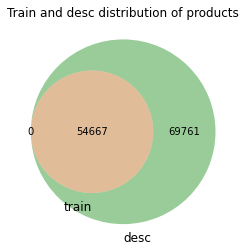

In [14]:
trainVenn = set(train_df['product_uid'].values)
descVenn = set(desc_df['product_uid'].values)
venn2([trainVenn, descVenn], ('train', 'desc'))
plt.title('Train and desc distribution of products')
plt.show()

In [16]:
desc_df['product_description'][0]

'Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a "Z" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws'

In [17]:
desc_df['product_description'][10]

'Recycler 22 in. Personal Pace Variable Speed Self-Propelled Gas Lawn Mower with Briggs & Stratton Engine. For homeowners seeking a lawn mower with high quality, a user-friendly design, and excellent mulching capability. Toro products are known for Smart Features and Proven Dependability. Count On It.Recycler cutting system - front throw chamber and atomic blade lift, suspend and re-cut clippings into a fine mulch for a healthy, lush lawn22 in. steel deck with atomic bladeBriggs & Stratton 7.25 ft. lbs. gross torque 190cc engine with ready start - no need to prime or chokePersonal pace self-propel system senses and smoothly adjusts to your preferred walking pace3-in-1: mulch, side discharge or bagBag-on-demand - quickly switch from mulching to bagging in seconds by flipping the quick-change leverRear wheel drive self propel provides better traction in all cutting conditions - let the mower do the workWashout port - attach a hose to the mower deck to easily clean the underside of the de

In [18]:
desc_df['product_description'][20]

"Installed in parks and backyards across the globe, Rain Bird's 1800 Series is the #1 selling commercial-grade pop-up sprinkler in the world. Chosen for its reliability, heavy-duty materials and versatility, the 1800 Series offers a broad selection of spray heads for watering shrubs, small lawns and irregularly shaped planting areas. Precision spray heads and nozzles customize your watering system to cover virtually any configuration of lawn or garden - not the sidewalk or driveway. The 1800 Series offers Rain Bird's patented pop-up mechanism for out-of-sight retraction into the lawn when not in operation. A wide choice of nozzles provides full circle, partial circle coverage or infinite pattern adjustment for optimum head-to-head coverage.Spray distance from 8 ft. to 15 ft.Patented close-in watering for most efficient uniform water coverage, resulting in the elimination of dry brown spotsHeavy-duty stainless-steel spring helps ensure flush retractionPop-up sprinkler head features a to

# Hợp nhất các tệp và xử lý dữ liệu thiếu

Các file dữ liệu gốc hiện tại chứa thông tin về các khía cạnh khác nhau và liên kết bởi một số trường dữ liệu chung. Sau đây là các trình tự chính bước đầu xử lý dữ liệu:

- Trước hết, chúng ta thực hiện hợp nhất dữ liệu từ nhiều file để thu được bảng dữ liệu đầy đủ tất cả các thông tin có thể.
- Trong quá trình thao tác thực hiện một số tác vụ trích xuất thêm các trường thông tin mới
- Trong và sau quá trình hợp nhất có thể xuất hiện các trường dữ liệu bị thiếu, chúng ta cần có giải pháp bổ sung nó
- Lưu dữ liệu thu được cuối cùng vào tệp

**Dữ liệu trong bảng attribute**
- Ghép các thuộc tính của cùng 1 sản phẩm vào thành 1 thuộc tính chung duy nhất
- Xoá các dòng trùng lặp (giữ lại mỗi sản phẩm chỉ còn 1 dòng thuộc tính)
- Hợp nhất bảng đã qua xử lý với dữ liệu train (thành một trường mới của dữ liệu train)
- Trích xuất thêm các trường thông tin thuộc tính: Brand, Color, Material

In [ ]:
#Fill null values 
tmp['value'].fillna('',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
tmp.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [ ]:
tmp2 = tmp.groupby(['product_uid'])['value'].transform(lambda x: ' '.join(x))
tmp2.shape

(932000,)

In [ ]:
tmp['total_attr'] = tmp2
tmp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_uid,name,value,total_attr
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...,Versatile connector for various 90Â° connectio...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...,Versatile connector for various 90Â° connectio...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.,Versatile connector for various 90Â° connectio...
4,100001.0,Bullet05,Made from 12-Gauge steel,Versatile connector for various 90Â° connectio...


In [ ]:
tmp3 = tmp[['product_uid','total_attr']].drop_duplicates()
tmp3.shape

(38404, 2)

In [ ]:
#Adding attributes to the train dataset
train_df = pd.merge(train_df, tmp3, on='product_uid', how='left')
print(train_df.shape)

(74067, 6)


In [ ]:
train_df.head()

,id,product_uid,product_title,search_term,relevance,total_attr
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev..."
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...


Thêm thuộc tính Brand

In [ ]:
#Adding brand as a feature
brands = attr_df[attr_df['name']=='MFG Brand Name']
brands_tmp = brands[['product_uid','value']]
train_df = pd.merge(train_df, brands_tmp, on='product_uid', how='left')
train_df.rename(columns = {'value':'brand'}, inplace = True) 
train_df.head()

,id,product_uid,product_title,search_term,relevance,total_attr,brand
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta


Thêm thuộc tính Material

In [ ]:
#Adding material as a feature
material = attr_df[attr_df['name']=='Material']
material_tmp = material[['product_uid','value']]
train_df = pd.merge(train_df, material_tmp, on='product_uid', how='left')
train_df.rename(columns = {'value':'material'}, inplace = True) 
train_df.head()

,id,product_uid,product_title,search_term,relevance,total_attr,brand,material
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,NaN
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN


Thêm thuộc tính Color

In [ ]:
#Adding material as a feature
colors = attr_df[attr_df['name']=='Color Family']
colors_tmp = colors[['product_uid','value']]
train_df = pd.merge(train_df, colors_tmp, on='product_uid', how='left')
train_df.rename(columns = {'value':'color'}, inplace = True) 
train_df.head()

,id,product_uid,product_title,search_term,relevance,total_attr,brand,material,color
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,NaN,Browns / Tans
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome


**Dữ liệu Description** 

- Hợp nhất dữ liệu product_description với dữ liệu train
- Tách các từ như 'steelGalvanized' -> 'steel Galvanized'

In [ ]:
train_df = pd.merge(train_df, desc_df, on='product_uid', how='left')
train_df.head()

,id,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,NaN,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...


In [ ]:
train_df['product_description'] = train_df['product_description'].apply(lambda x: ' '.join(re.findall(r'[A-Z]?[^A-Z\s]+|[A-Z]+', x)) )

In [ ]:
train_df['product_description'][0]

'Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong- Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a " Z" at the end of the model number). Versatile connector for various 90 connections and home repair projects Stronger than angled nailing or screw fastening alone Help ensure joints are consistently straight and strong Dimensions: 3 in. x 3 in. x 1-1/2 in. Made from 12- Gauge steel Galvanized for extra corrosion resistance Install with 10d common nails or #9 x 1-1/2 in. Strong- Drive SD screws'

In [ ]:
train_df['product_description'][10]

'Valley View Industries Metal Stakes (4- Pack) are 9 in. galvanized steel stakes for use with all Valley View lawn edgings and brick and paver edgings. These utility stakes can also be used for many other purposes. It is recommended that anchor stakes are used every five feet on designs that have the edging in straight lengths. Where there are curved designs for edgings, additional anchor stakes are recommended at the curve points. Anchor stakes should be staked in at a 45 degree angle. Gloves and eye protection are recommended. Can be used with all valley View lawn edgings and brick/ paver edgings Utility stakes can be used for many purposes Galvanized steel for strength9 in. length Priced competitively yet provides much more value in product'

**Các dữ liệu bị thiếu**

- In ra thông tin thống kê các trường dữ liệu thiếu
- Xử lý các bản ghi bị thiếu trường 'Brand'
- Xử lý các bản ghi bị thiếu trường 'Attribute'
- Xử lý các bản ghi bị thiếu trường 'Material'
- Xử lý các bản ghi bị thiếu trường 'Color'

In [ ]:
train_df.drop('id',inplace=True, axis=1)
for col in train_df.columns:
  print('{} has {} null values'.format(col, train_df[col].isna().values.sum()))

product_uid has 0 null values
product_title has 0 null values
search_term has 0 null values
relevance has 0 null values
total_attr has 17520 null values
brand has 17628 null values
material has 54268 null values
color has 47514 null values
product_description has 0 null values


In [ ]:
train_df.head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,NaN,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...


Xử lý các bản ghi bị thiếu giá trị trường Brand:

- Lưu trữ tất cả các giá trị brand (unique)
- Thống kê độ dài các brand → các brand có độ dài từ 1 đến 6 từ
- Với nhận xét rằng nội dung trường brand thường là cụm đầu của description, ta điền nội dung các ô bị thiếu bằng cách dò xem cụm từ 1 đến 6 từ đầu của description tương ứng có nằm trong kho brand unique đã lưu trữ bên trên không, nếu có, ta thực hiện cắt cụm và điền. Thao tác này đã điền được xấp xỉ 15 nghìn giá trị brand bị thiếu. Với những bản ghi còn lại (hơn 2,6 nghìn bản ghi), ta lấy từ đầu tiên trong description để bổ sung cho ô thiếu.

In [ ]:
train_df[train_df['brand'].isnull()].head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description
198,100109,Shark Navigator Lift-Away Deluxe Bagless Vacuu...,shark cleaner,3.0,NaN,NaN,NaN,NaN,A lightweight and steerable Never Loses Suctio...
199,100109,Shark Navigator Lift-Away Deluxe Bagless Vacuu...,shark vacuum,3.0,NaN,NaN,NaN,NaN,A lightweight and steerable Never Loses Suctio...
219,100124,"Champion Power Equipment 3,100 Watt Gasoline P...",inverter generator,3.0,NaN,NaN,NaN,NaN,The Champion Power Equipment 16590 gasoline po...
302,100160,DEWALT 20-Volt Max Lithium-Ion Cordless Combo ...,dewalt combo kit,3.0,NaN,NaN,NaN,NaN,The DEWALT DCK 940 D2 combo kit is ideal for j...
585,100329,5-Step Pressure-Treated Cedar-Tone Pine Stair ...,stair steps,3.0,1.5 in 62.75 in 9 in Dimensions are 1-1/2 in. ...,NaN,Wood,Brown,Get head starts building outdoor stairs with t...


In [ ]:
unique_brands = np.unique(train_df['brand'].dropna().values)
print('Unique brands: ', len(unique_brands))

Unique brands:  3142


In [ ]:
#Length of brand name
lengths = train_df['brand'].dropna().apply(lambda x: len(x.split()))
lengths.value_counts()

1    35603
2    16115
3     5099
4      425
5       39
6       31
Name: brand, dtype: int64

In [ ]:
def first_n_sentence(n, sent):
  return ' '.join(sent.split()[:n])

In [ ]:
null_brand_df = train_df[train_df['brand'].isnull()]
notnull_brand_df = train_df.dropna()

In [ ]:
for i, row in null_brand_df.iterrows():
  title = row['product_title']
  if first_n_sentence(6, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(6, title)
  elif first_n_sentence(5, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(5, title)
  elif first_n_sentence(4, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(4, title)
  elif first_n_sentence(3, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(3, title)
  elif first_n_sentence(2, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(2, title)
  elif first_n_sentence(1, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(1, title)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

In [ ]:
null_brand_df['brand'].isna().values.sum()

2624

In [ ]:
for i, row in null_brand_df.iterrows():
  title = row['product_title']
  if first_n_sentence(6, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(6, title)
  elif first_n_sentence(5, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(5, title)
  elif first_n_sentence(4, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(4, title)
  elif first_n_sentence(3, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(3, title)
  elif first_n_sentence(2, title) in unique_brands:
    null_brand_df['brand'].loc[i] = first_n_sentence(2, title)
  else:
    null_brand_df['brand'].loc[i] = first_n_sentence(1, title)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

In [ ]:
null_brand_df['brand'].isna().values.sum()

0

In [ ]:
train_df['brand'].loc[null_brand_df.index] = null_brand_df['brand'].values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Xử lý các bản ghi bị thiếu giá trị trường attribute

Với quan sát rằng nội dung của trường attribute (trong các bản ghi không bị thiếu) có sự tương đồng với nội dung trường description. Do đó ta bổ sung dữ liệu thiếu bằng cách copy nội dung từ trường description sang.

In [ ]:
null_attr_df = train_df[train_df['total_attr'].isnull()]

In [ ]:
null_attr_df['total_attr'] = null_attr_df['product_description'].copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_df['total_attr'].loc[null_attr_df.index] = null_attr_df['total_attr'].values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
for col in train_df.columns:
  print('{} has {} null values'.format(col, train_df[col].isna().values.sum()))

product_uid has 0 null values
product_title has 0 null values
search_term has 0 null values
relevance has 0 null values
total_attr has 0 null values
brand has 0 null values
material has 54268 null values
color has 47514 null values
product_description has 0 null values


In [ ]:
train_df.head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,NaN,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...


Xử lý bản ghi thiếu nội dung trường material:

Thay các giá trị null bằng xâu rỗng ‘’

In [ ]:
train_df['material'] = train_df['material'].replace(np.nan, '', regex=True)

Xử lý bản ghi thiếu nội dung trường color:

Thay các giá trị null bằng xâu rỗng ‘’

In [ ]:
train_df['color'] = train_df['color'].replace(np.nan, '', regex=True)

In [ ]:
for col in train_df.columns:
  print('{} has {} null values'.format(col, train_df[col].isna().values.sum()))

product_uid has 0 null values
product_title has 0 null values
search_term has 0 null values
relevance has 0 null values
total_attr has 0 null values
brand has 0 null values
material has 0 null values
color has 0 null values
product_description has 0 null values


**Save data merge**

Sau khi thực hiện các thao tác hợp nhất và xử lý dữ liệu mới bên trên, ta lưu lại dữ liệu thu được vào file merge_data để tiện cho sử dụng các lần sau

In [ ]:
# save merge data
train_df.to_csv(MERGE_DATA_PATH, index=False)

# Clean data cơ bản cho toàn bộ dữ liệu

- Các bước làm sạch dữ liệu tổng hợp cơ bản bao gồm:
  - Tách các từ dính liền (ngắt bởi dấu) thành từ chuẩn,
  - Chuẩn hoá đơn vị (các đơn vị được kí hiệu khác nhau cho cùng 1 ý nghĩa sẽ được đưa về 1 loại thống nhất), 
  - Xoá các kí tự đặc biệt, 
  - Thống nhất biểu diễn số thập phân ('zero' sẽ được đổi thành '0',..), 
  - Lower case, 
  - Loại bỏ stop word. 
- Phần code bên dưới sẽ dịnh nghĩa các hàm thực hiện các thao tác trên, sau đó áp dụng cho từng cột trong dữ liệu train tổng hợp
- Riêng với trường 'search', em thêm 1 bước xử lý dữ liệu nữa là đổi 'in' -> 'in.' do thường 'in' trong từ khoá tìm kiếm sẽ mang ý nghĩa như 'in.'.


In [ ]:
merge_df = pd.read_csv(MERGE_DATA_PATH,encoding='iso-8859-1')

In [ ]:
merge_df.head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90ÃÂ° connect...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90ÃÂ° connect...,Simpson Strong-Tie,Galvanized Steel,NaN,"Not only do angles make joints stronger, they ..."
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,NaN,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,NaN,Chrome,Update your bathroom with the Delta Vero Singl...


In [ ]:
def unit_counts(data,column):
  words = ' '.join(data[column].unique()).split()
  units = ['feet', 'foot','ft.','fathom', 'fm','fm.','inches', 'inchs','in', 'inch','in.', 'centi','cm.' ,'yd.', 'yd','yard', 'yds',
          'ac', 'ac.' , 'acre', 'sq', 'square', 'sq.', 'lb', 'lb.','lbs', 'pound', 'pounds','oz', 'ozs', 'ounce', 'ounces', 'oz.',
          'g', 'gram', 'gr', 'mg', 'st', 'st.', 'stone', 'kg', 'tsp', 'g.', 'tbsp', 'qt', 'ml', 'ml.', 'l',  'l', 'litre','pt', 
          'pt.', 'gal', 'gals', 'gallon', 'gallons','galons', 'gals.','gal.', 'mph', 'cal', 'kn','metre', 'm', 'cm', 'centimeters',
          'km', 'milimeters' , 'mm', 'cu', 'cubic', 'volts', 'volt', 'wattage', 'watts', 'watt', 'amperes', 'ampere', 'amps', 'amp', 'qquart', 'quart', 'hours', 'hour', 'hrs.']
  counts = {}
  for unit in units:
    cnt = list(words).count(unit)
    counts[unit] = cnt
  return counts

In [ ]:
print(unit_counts(merge_df,'product_description'))
print(unit_counts(merge_df,'total_attr'))
print(unit_counts(merge_df,'product_title'))
print(unit_counts(merge_df,'search_term'))

{'feet': 963, 'foot': 1097, 'ft.': 17173, 'fathom': 0, 'fm': 0, 'fm.': 0, 'inches': 196, 'inchs': 0, 'in': 70808, 'inch': 402, 'in.': 84645, 'centi': 0, 'cm.': 0, 'yd.': 10, 'yd': 15, 'yard': 680, 'yds': 0, 'ac': 5, 'ac.': 0, 'acre': 27, 'sq': 29, 'square': 2191, 'sq.': 3908, 'lb': 214, 'lb.': 2777, 'lbs': 94, 'pound': 34, 'pounds': 72, 'oz': 22, 'ozs': 0, 'ounce': 26, 'ounces': 20, 'oz.': 1515, 'g': 30, 'gram': 18, 'gr': 0, 'mg': 5, 'st': 2, 'st.': 0, 'stone': 1869, 'kg': 12, 'tsp': 0, 'g.': 2, 'tbsp': 0, 'qt': 2, 'ml': 33, 'ml.': 2, 'l': 87, 'litre': 0, 'pt': 3, 'pt.': 43, 'gal': 4, 'gals': 2, 'gallon': 282, 'gallons': 188, 'galons': 0, 'gals.': 1, 'gal.': 818, 'mph': 158, 'cal': 0, 'kn': 1, 'metre': 0, 'm': 159, 'cm': 127, 'centimeters': 1, 'km': 0, 'milimeters': 0, 'mm': 1759, 'cu': 7, 'cubic': 31, 'volts': 95, 'volt': 162, 'wattage': 119, 'watts': 330, 'watt': 641, 'amperes': 3, 'ampere': 5, 'amps': 96, 'amp': 184, 'qquart': 0, 'quart': 44, 'hours': 2288, 'hour': 863, 'hrs.': 4}
{

In [ ]:
print(unit_counts(merge_df,'brand'))
# print(unit_counts(merge_df,'material'))
# print(unit_counts(merge_df,'color'))

{'feet': 0, 'foot': 0, 'ft.': 0, 'fathom': 0, 'fm': 0, 'fm.': 0, 'inches': 0, 'inchs': 0, 'in': 0, 'inch': 0, 'in.': 0, 'centi': 0, 'cm.': 0, 'yd.': 0, 'yd': 0, 'yard': 0, 'yds': 0, 'ac': 0, 'ac.': 0, 'acre': 0, 'sq': 0, 'square': 0, 'sq.': 0, 'lb': 0, 'lb.': 0, 'lbs': 0, 'pound': 0, 'pounds': 0, 'oz': 0, 'ozs': 0, 'ounce': 0, 'ounces': 0, 'oz.': 0, 'g': 0, 'gram': 0, 'gr': 0, 'mg': 0, 'st': 0, 'st.': 0, 'stone': 0, 'kg': 0, 'tsp': 0, 'g.': 0, 'tbsp': 0, 'qt': 0, 'ml': 0, 'ml.': 0, 'l': 0, 'litre': 0, 'pt': 0, 'pt.': 0, 'gal': 0, 'gals': 0, 'gallon': 0, 'gallons': 0, 'galons': 0, 'gals.': 0, 'gal.': 0, 'mph': 0, 'cal': 0, 'kn': 0, 'metre': 0, 'm': 0, 'cm': 0, 'centimeters': 0, 'km': 0, 'milimeters': 0, 'mm': 0, 'cu': 0, 'cubic': 0, 'volts': 0, 'volt': 0, 'wattage': 0, 'watts': 0, 'watt': 0, 'amperes': 0, 'ampere': 0, 'amps': 0, 'amp': 0, 'qquart': 0, 'quart': 0, 'hours': 0, 'hour': 0, 'hrs.': 0}


In [ ]:
strNum = {'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9}
def convert_sent(s):
  s = " " + s + " "
  # Tach cum bi dau cham ngat giua thanh cac tu
  s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s)
  s = re.sub(r"([a-z])([A-Z])", r"\1 \2", s)
  s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)

  # Chuan hoa don vi
  s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
  s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
  s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
  s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
  s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
  s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
  s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
  s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
  s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
  s = re.sub(r"([0-9]+)( *)(°|degrees|degree)\.?", r"\1 deg. ", s)
  s = re.sub(r"([0-9]+)( *)(v|volts|volt)\.?", r"\1 volt. ", s)
  s = re.sub(r"([0-9]+)( *)(wattage|watts|watt)\.?", r"\1 watt. ", s)
  s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1 amp. ", s)
  s = re.sub(r"([0-9]+)( *)(qquart|quart)\.?", r"\1 qt. ", s)
  s = re.sub(r"([0-9]+)( *)(hours|hour|hrs.)\.?", r"\1 hr ", s)
  s = re.sub(r"([0-9]+)( *)(gallons per minute|gallon per minute|gal per minute|gallons/min.|gallons/min)\.?", r"\1 gal. per min. ", s)
  s = re.sub(r"([0-9]+)( *)(gallons per hour|gallon per hour|gal per hour|gallons/hour|gallons/hr)\.?", r"\1 gal. per hr ", s)

  # Xoa cac ki tu dac biet
  s = s.replace("$"," ")
  s = s.replace("?"," ")
  s = s.replace("&nbsp;"," ")
  s = s.replace("&amp;","&")
  s = s.replace("&#39;","'")
  s = s.replace("/>/Agt/>","")
  s = s.replace("</a<gt/","")
  s = s.replace("gt/>","")
  s = s.replace("/>","")
  s = s.replace("<br","")
  s = s.replace("<.+?>","")
  s = s.replace("[ &<>)(_,;:!?\+^~@#\$]+"," ")
  s = s.replace("'s\\b","")
  s = s.replace("[']+","")
  s = s.replace("[\"]+","")
  s = s.replace("-"," ")
  s = s.replace("+"," ")
  s = s.replace("..",".")
  s = s.replace(",","")
  s = s.replace("-"," ")
  s = s.replace("//","/")
  s = s.replace("/"," ")
  s = s.replace("..",".")
  s = s.replace(" / "," ")
  s = s.replace(" \\ "," ")
  s = s.replace("."," . ")
  s = s.replace("  "," ")
  s = re.sub(r"(^\.|/)", r"", s)
  s = re.sub(r"(\.|/)$", r"", s)
  s = re.sub(r"([0-9])([a-z])", r"\1 \2", s)
  s = re.sub(r"([a-z])([0-9])", r"\1 \2", s)
  s = re.sub(r"([a-z])( *)\.( *)([a-z])", r"\1 \4", s)
  s = re.sub(r"([a-z])( *)/( *)([a-z])", r"\1 \4", s)
  s = s.replace("*"," xbi ")
  s = s.replace(" by "," xbi ")

  # num to string
  s = (" ").join([str(strNum[z]) if z in strNum else z for z in s.split(" ")])
  s = " ".join([re.sub('[^A-Za-z0-9-./]', ' ', word) for word in s.lower().split()])
  return s

def preprocessing(sent):
  words = re.split(r'\W+', sent)
  words = [word.lower() for word in words]
  res = ' '.join(words)
  cleaned = convert_sent(res) 
  return cleaned

def preprocessing_search(sent):
  words = re.split(r'\W+', sent)
  words = [word.lower() for word in words]
  res = ' '.join(words)
  cleaned = convert_sent(res) 
  cleaned = cleaned.replace(' in ', ' in. ')
  return cleaned

In [ ]:
train_df['clean_material'] = train_df['material'].apply(lambda x : preprocessing(x))
train_df['clean_color'] = train_df['color'].apply(lambda x : preprocessing(x))

In [ ]:
train_df['clean_title'] = train_df['product_title'].apply(lambda x : preprocessing(x))
train_df['clean_brand'] = train_df['brand'].apply(lambda x : preprocessing(x))
train_df['clean_description'] = train_df['product_description'].apply(lambda x : preprocessing(x))
train_df['clean_attributes'] = train_df['total_attr'].apply(lambda x : preprocessing(x))

train_df['clean_search'] = train_df['search_term'].apply(lambda x : preprocessing_search(x))
train_df.head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description,clean_title,clean_brand,clean_description,clean_attributes,clean_search
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,,"Not only do angles make joints stronger, they ...",simpson strong tie 12 gauge angle,simpson strong tie,not only do angles make joints stronger they a...,versatile connector for various 90 connection...,angle bracket
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,,"Not only do angles make joints stronger, they ...",simpson strong tie 12 gauge angle,simpson strong tie,not only do angles make joints stronger they a...,versatile connector for various 90 connection...,l bracket
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...,behr premium textured deckover 1 gal sc 141 tu...,behr premium textured deckover,behr premium textured deckover is an innovativ...,brush roller spray 6 63 in . 7 76 in . 6 63 in...,deck over
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,,Chrome,Update your bathroom with the Delta Vero Singl...,delta vero 1 handle shower only faucet trim ki...,delta,update your bathroom with the delta vero singl...,combo tub and shower no includes the trim kit ...,rain shower head
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,,Chrome,Update your bathroom with the Delta Vero Singl...,delta vero 1 handle shower only faucet trim ki...,delta,update your bathroom with the delta vero singl...,combo tub and shower no includes the trim kit ...,shower only faucet


In [ ]:
# save merge data
CLEAN_DATA_PATH_A="/content/drive/MyDrive/BTL_ML/cleanDataA.csv"
train_df.to_csv(CLEAN_DATA_PATH_A, index=False)

# Correcting Search Term và bỏ Stopword

Sau khi làm sạch cơ bản dữ liệu, em sẽ sửa chính tả cho search_term và loại bỏ stopword khỏi các trường dữ liệu train
- Sửa chính tả cho search_term: Em tham khảo thao tác sửa chính tả từ [http://norvig.com/spell-correct.html](http://norvig.com/spell-correct.html). Ý tưởng chính là toàn bộ dữ liệu train mình có sẽ tạo thành một kho dữ liệu. Sau đó em sẽ do các cụm từ tìm kiếm với kho dữ liệu đó, từ nào bị sai sẽ chuyển nó thành từ ‘gần giống’ nó nhất trong kho dữ liệu
- Loại bỏ stopword: Viết hàm và loại bỏ stopword cho tất cả các cột. Một điều lưu ý là sau thao tác này, một số bản ghi ở một số trường mang giá trị rỗng. Do dữ liệu của mình có nhiều và số lượng các bản ghi bị rỗng không lớn, nên để xử lý nhanh, em lựa chọn loại bỏ các bản ghi có trường ‘search’ và ‘brand’ mang giá trị rỗng (chỉ khoảng gần 70 bản ghi).

**Tạo kho dữ liệu**

In [ ]:
allWords = train_df['clean_attributes'] + " "  + train_df['clean_description'] + " " + train_df['clean_brand'] + " " + train_df['clean_title'] + " " + train_df['material'] + " " + train_df['color']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english')) 

In [ ]:
def remove_stop_words(sent):
  words = sent.split()
  words = [w for w in words if not w in stop_words]
  return ' '.join(words)

In [ ]:
allWords = allWords.apply(lambda x : remove_stop_words(x)) 

In [ ]:
# Save allWords
np.savetxt('allWords.txt', allWords.values, fmt='%s')

**Sửa chính tả cho các cụm từ tìm kiếm**

In [ ]:
# from http://norvig.com/spell-correct.html
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('allWords.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
def corrected_sentence(sentence):
  sentence = sentence.split()
  sentence = [correction(word) for word in sentence]
  return ' '.join(sentence)

In [ ]:
train_df.head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description,clean_title,clean_brand,clean_description,clean_attributes,clean_search,clean_material,clean_color
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,,"Not only do angles make joints stronger, they ...",simpson strong tie 12 gauge angle,simpson strong tie,not only do angles make joints stronger they a...,versatile connector for various 90 connection...,angle bracket,galvanized steel,
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,,"Not only do angles make joints stronger, they ...",simpson strong tie 12 gauge angle,simpson strong tie,not only do angles make joints stronger they a...,versatile connector for various 90 connection...,l bracket,galvanized steel,
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...,behr premium textured deckover 1 gal sc 141 tu...,behr premium textured deckover,behr premium textured deckover is an innovativ...,brush roller spray 6 63 in . 7 76 in . 6 63 in...,deck over,,browns tans
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,,Chrome,Update your bathroom with the Delta Vero Singl...,delta vero 1 handle shower only faucet trim ki...,delta,update your bathroom with the delta vero singl...,combo tub and shower no includes the trim kit ...,rain shower head,,chrome
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,,Chrome,Update your bathroom with the Delta Vero Singl...,delta vero 1 handle shower only faucet trim ki...,delta,update your bathroom with the delta vero singl...,combo tub and shower no includes the trim kit ...,shower only faucet,,chrome


In [ ]:
train_df['correct_search'] = train_df['clean_search'].apply(lambda x: corrected_sentence(x))
train_df.head()

,product_uid,product_title,search_term,relevance,total_attr,brand,material,color,product_description,clean_title,clean_brand,clean_description,clean_attributes,clean_search,clean_material,clean_color,correct_search
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,,"Not only do angles make joints stronger, they ...",simpson strong tie 12 gauge angle,simpson strong tie,not only do angles make joints stronger they a...,versatile connector for various 90 connection...,angle bracket,galvanized steel,,angle bracket
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,Versatile connector for various 90Â° connectio...,Simpson Strong-Tie,Galvanized Steel,,"Not only do angles make joints stronger, they ...",simpson strong tie 12 gauge angle,simpson strong tie,not only do angles make joints stronger they a...,versatile connector for various 90 connection...,l bracket,galvanized steel,,l bracket
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Brush,Roller,Spray 6.63 in 7.76 in 6.63 in Rev...",BEHR Premium Textured DeckOver,,Browns / Tans,BEHR Premium Textured DECKOVER is an innovativ...,behr premium textured deckover 1 gal sc 141 tu...,behr premium textured deckover,behr premium textured deckover is an innovativ...,brush roller spray 6 63 in . 7 76 in . 6 63 in...,deck over,,browns tans,deck oven
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Combo Tub and Shower No Includes the trim kit ...,Delta,,Chrome,Update your bathroom with the Delta Vero Singl...,delta vero 1 handle shower only faucet trim ki...,delta,update your bathroom with the delta vero singl...,combo tub and shower no includes the trim kit ...,rain shower head,,chrome,rain shower head
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Combo Tub and Shower No Includes the trim kit ...,Delta,,Chrome,Update your bathroom with the Delta Vero Singl...,delta vero 1 handle shower only faucet trim ki...,delta,update your bathroom with the delta vero singl...,combo tub and shower no includes the trim kit ...,shower only faucet,,chrome,shower oily faucet


**Loại bỏ stopword cho các trường dữ liệu khác của tập train**

In [ ]:
final_df = pd.DataFrame() 
final_df['title'] = train_df['clean_title'].apply(lambda x : remove_stop_words(x)) 
final_df['brand'] = train_df['clean_brand'].apply(lambda x : remove_stop_words(x)) 
final_df['material'] = train_df['clean_material'].apply(lambda x : remove_stop_words(x)) 
final_df['color'] = train_df['clean_color'].apply(lambda x : remove_stop_words(x)) 
final_df['description'] = train_df['clean_description'].apply(lambda x : remove_stop_words(x)) 
final_df['attributes'] = train_df['clean_attributes'].apply(lambda x : remove_stop_words(x)) 
final_df['search'] = train_df['clean_search'].apply(lambda x : remove_stop_words(x)) 
final_df['corrected_search'] = train_df['correct_search'].apply(lambda x : remove_stop_words(x)) 
final_df['relevance'] = train_df['relevance']


In [ ]:
final_df.head()

,title,brand,material,color,description,attributes,search,corrected_search,relevance
0,simpson strong tie 12 gauge angle,simpson strong tie,galvanized steel,,angles make joints stronger also provide consi...,versatile connector various 90 connections hom...,angle bracket,angle bracket,3.00
1,simpson strong tie 12 gauge angle,simpson strong tie,galvanized steel,,angles make joints stronger also provide consi...,versatile connector various 90 connections hom...,l bracket,l bracket,2.50
2,behr premium textured deckover 1 gal sc 141 tu...,behr premium textured deckover,,browns tans,behr premium textured deckover innovative soli...,brush roller spray 6 63 . 7 76 . 6 63 revives ...,deck,deck oven,3.00
3,delta vero 1 handle shower faucet trim kit chr...,delta,,chrome,update bathroom delta vero single handle showe...,combo tub shower includes trim kit rough kit r...,rain shower head,rain shower head,2.33
4,delta vero 1 handle shower faucet trim kit chr...,delta,,chrome,update bathroom delta vero single handle showe...,combo tub shower includes trim kit rough kit r...,shower faucet,shower oily faucet,2.67


Xử lý một chút các bản ghi bị rỗng sau khi loại bỏ stopword

In [ ]:
len(final_df[final_df['search'] == ''])

20

In [ ]:
len(final_df[final_df['corrected_search'] == ''])

0

In [ ]:
len(final_df[final_df['brand'] == ''])

48

In [ ]:
len(final_df[final_df['material'] == ''])

54733

In [ ]:
len(final_df[final_df['color'] == ''])

47514

In [ ]:
final_df = final_df[final_df['search'] != '']
final_df = final_df[final_df['brand'] != '']

In [ ]:
len(final_df[final_df['brand'] == ''])

0

In [ ]:
len(final_df[final_df['search'] == ''])

0

In [ ]:
FINAL_DATA="/content/drive/MyDrive/BTL_ML/finalData.csv"
final_df.to_csv(FINAL_DATA, index=False)

# Feature engineering

Ở phần này, em thực hiện trích xuất đặc trưng để tổng hợp đầu vào cho huấn luyện mô hình. Về cơ bản, những feature của em được trích xuất bởi 3 cách khác nhau: 
- Tính mức độ trùng lặp của search_term và các trường dữ liệu về sản phẩm
- Các khoảng cách phổ biến giữa các từ (jaccard_similar, levenshtein_sililar, cosine_sililar) 
- Độ dài các trường dữ liệu

Việc trích xuất đặc trưng được thực hiện trên cả search_term gốc hoặc search_term đã qua chỉnh sửa.

In [ ]:
FINAL_DATA="/content/drive/MyDrive/BTL_ML/finalData.csv"
allData = pd.read_csv(FINAL_DATA,encoding='iso-8859-1')

In [ ]:
allData.head()

,title,brand,material,color,description,attributes,search,corrected_search,relevance
0,simpson strong tie 12 gauge angle,simpson strong tie,galvanized steel,NaN,angles make joints stronger also provide consi...,versatile connector various 90 connections hom...,angle bracket,angle bracket,3.00
1,simpson strong tie 12 gauge angle,simpson strong tie,galvanized steel,NaN,angles make joints stronger also provide consi...,versatile connector various 90 connections hom...,l bracket,l bracket,2.50
2,behr premium textured deckover 1 gal sc 141 tu...,behr premium textured deckover,NaN,browns tans,behr premium textured deckover innovative soli...,brush roller spray 6 63 . 7 76 . 6 63 revives ...,deck,deck oven,3.00
3,delta vero 1 handle shower faucet trim kit chr...,delta,NaN,chrome,update bathroom delta vero single handle showe...,combo tub shower includes trim kit rough kit r...,rain shower head,rain shower head,2.33
4,delta vero 1 handle shower faucet trim kit chr...,delta,NaN,chrome,update bathroom delta vero single handle showe...,combo tub shower includes trim kit rough kit r...,shower faucet,shower oily faucet,2.67


In [ ]:
for col in allData.columns:
  print('{} has {} null values'.format(col, allData[col].isna().values.sum()))

title has 0 null values
brand has 0 null values
material has 54669 null values
color has 47455 null values
description has 0 null values
attributes has 0 null values
search has 0 null values
corrected_search has 0 null values
relevance has 0 null values


In [ ]:
allData['color'] = allData['color'].replace(np.nan, '', regex=True)
allData['material'] = allData['material'].replace(np.nan, '', regex=True)

**Tính mức độ bao phủ của các trường dữ liệu với cụm từ khoá tìm kiếm**

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def get_partial_ratio(col1, col2, data):
  return [fuzz.partial_ratio(data[col1][i], data[col2][i]) for i in range(0, len(data))]


def get_token_set_ratio(col1, col2, data):
  return [fuzz.token_set_ratio(data[col1][i], data[col2][i]) for i in range(0, len(data))]

In [ ]:
# fuzzy search with raw search
allData["pr_title"] = get_partial_ratio('search','title', allData)
allData["pr_brand"] = get_partial_ratio('search','brand', allData)
allData["pr_material"] = get_partial_ratio('search','material', allData)
allData["pr_color"] = get_partial_ratio('search','color', allData)
allData["pr_description"] = get_partial_ratio('search','description', allData)

In [ ]:
# fuzzy search with raw search
allData["tsr_title"] = get_token_set_ratio('search','title', allData)
allData["tsr_brand"] = get_token_set_ratio('search','brand', allData)
allData["tsr_material"] = get_token_set_ratio('search','material', allData)
allData["tsr_color"] = get_token_set_ratio('search','color', allData)
allData["tsr_description"] = get_token_set_ratio('search','description', allData)

In [ ]:
# fuzzy search with correct search
allData["pr_title_correct"] = get_partial_ratio('corrected_search','title', allData)
allData["pr_brand_correct"] = get_partial_ratio('corrected_search','brand', allData)
allData["pr_material_correct"] = get_partial_ratio('corrected_search','material', allData)
allData["pr_color_correct"] = get_partial_ratio('corrected_search','color', allData)
allData["pr_description_correct"] = get_partial_ratio('corrected_search','description', allData)

In [ ]:
# fuzzy search with correct search
allData["tsr_title_correct"] = get_token_set_ratio('corrected_search','title', allData)
allData["tsr_brand_correct"] = get_token_set_ratio('corrected_search','brand', allData)
allData["tsr_material_correct"] = get_token_set_ratio('corrected_search','material', allData)
allData["tsr_color_correct"] = get_token_set_ratio('corrected_search','color', allData)
allData["tsr_description_correct"] = get_token_set_ratio('corrected_search','description', allData)

**Tính các khoảng cách phổ biến giữa từ khoá tìm kiếm và các trường dữ liệu khác**

In [ ]:
!pip install textdistance

In [ ]:
import textdistance

In [ ]:
def get_jaccard_similar(col1, col2, data):
  return [textdistance.jaccard(data[col1][i], data[col2][i]) for i in range(0, len(data))]

def get_levenshtein_sililar(col1, col2, data):
  return [textdistance.levenshtein(data[col1][i], data[col2][i]) for i in range(0, len(data))]

def get_cosine_sililar(col1, col2, data):
  return [textdistance.cosine(data[col1][i], data[col2][i]) for i in range(0, len(data))]

In [ ]:
# text distance with raw search
allData["js_title"] = get_jaccard_similar('search','title', allData)
allData["js_brand"] = get_jaccard_similar('search','brand', allData)
allData["js_material"] = get_jaccard_similar('search','material', allData)
allData["js_color"] = get_jaccard_similar('search','color', allData)
allData["js_description"] = get_jaccard_similar('search','description', allData)

In [ ]:
# text distance with raw search
allData["ls_title"] = get_levenshtein_sililar('search','title', allData)
allData["ls_brand"] = get_levenshtein_sililar('search','brand', allData)
allData["ls_material"] = get_levenshtein_sililar('search','material', allData)
allData["ls_color"] = get_levenshtein_sililar('search','color', allData)
allData["ls_description"] = get_levenshtein_sililar('search','description', allData)

In [ ]:
# text distance with raw search
allData["cs_title"] = get_cosine_sililar('search','title', allData)
allData["cs_brand"] = get_cosine_sililar('search','brand', allData)
allData["cs_material"] = get_cosine_sililar('search','material', allData)
allData["cs_color"] = get_cosine_sililar('search','color', allData)
allData["cs_description"] = get_cosine_sililar('search','description', allData)

In [ ]:
# text distance with raw search
allData["js_title_correct"] = get_jaccard_similar('corrected_search','title', allData)
allData["js_brand_correct"] = get_jaccard_similar('corrected_search','brand', allData)
allData["js_material_correct"] = get_jaccard_similar('corrected_search','material', allData)
allData["js_color_correct"] = get_jaccard_similar('corrected_search','color', allData)
allData["js_description_correct"] = get_jaccard_similar('corrected_search','description', allData)

In [ ]:
# text distance with raw search
allData["ls_title_correct"] = get_levenshtein_sililar('corrected_search','title', allData)
allData["ls_brand_correct"] = get_levenshtein_sililar('corrected_search','brand', allData)
allData["ls_material_correct"] = get_levenshtein_sililar('corrected_search','material', allData)
allData["ls_color_correct"] = get_levenshtein_sililar('corrected_search','color', allData)
allData["ls_description_correct"] = get_levenshtein_sililar('corrected_search','description', allData)

In [ ]:
# text distance with raw search
allData["cs_title_correct"] = get_cosine_sililar('corrected_search','title', allData)
allData["cs_brand_correct"] = get_cosine_sililar('corrected_search','brand', allData)
allData["cs_material_correct"] = get_cosine_sililar('corrected_search','material', allData)
allData["cs_color_correct"] = get_cosine_sililar('corrected_search','color', allData)
allData["cs_description_correct"] = get_cosine_sililar('corrected_search','description', allData)

**Tính độ dài các bản ghi của các trường dữ liệu**

In [ ]:
# find all length 
allData['len_title'] = allData['title'].apply(lambda x : len(x.split()))
allData['len_brand'] = allData['brand'].apply(lambda x : len(x.split()))
allData['len_material'] = allData['material'].apply(lambda x : len(x.split()))
allData['len_color'] = allData['color'].apply(lambda x : len(x.split()))
allData['len_description'] = allData['description'].apply(lambda x : len(x.split()))
allData['len_search'] = allData['search'].apply(lambda x : len(x.split()))
allData['len_search_correct'] = allData['corrected_search'].apply(lambda x : len(x.split()))

In [ ]:
allData.head()

,title,brand,material,color,description,attributes,search,corrected_search,relevance,pr_title,pr_brand,pr_material,pr_color,pr_description,tsr_title,tsr_brand,tsr_material,tsr_color,tsr_description,pr_title_correct,pr_brand_correct,pr_material_correct,pr_color_correct,pr_description_correct,tsr_title_correct,tsr_brand_correct,tsr_material_correct,tsr_color_correct,tsr_description_correct,js_title,js_brand,js_material,js_color,js_description,ls_title,ls_brand,ls_material,ls_color,ls_description,cs_title,cs_brand,cs_material,cs_color,cs_description,js_title_correct,js_brand_correct,js_material_correct,js_color_correct,js_description_correct,len_title,len_brand,len_material,len_color,len_description,len_search,len_search_correct,ls_title_correct,ls_brand_correct,ls_material_correct,ls_color_correct,ls_description_correct,cs_title_correct,cs_brand_correct,cs_material_correct,cs_color_correct,cs_description_correct
0,simpson strong tie 12 gauge angle,simpson strong tie,galvanized steel,,angles make joints stronger also provide consi...,versatile connector various 90 connections hom...,angle bracket,angle bracket,3.00,56,30,24,0,69,56,19,21,0,1,56,30,24,0,69,56,19,21,0,1,0.277778,0.240000,0.45,0.000000,0.020000,27,15,13,13,637,0.482805,0.392232,0.624038,0.000000,0.141421,0.277778,0.240000,0.45,0.000000,0.020000,6,3,2,0,98,2,2,27,15,13,13,637,0.482805,0.392232,0.624038,0.000000,0.141421
1,simpson strong tie 12 gauge angle,simpson strong tie,galvanized steel,,angles make joints stronger also provide consi...,versatile connector various 90 connections hom...,l bracket,l bracket,2.50,36,33,22,0,33,10,15,32,0,1,36,33,22,0,33,10,15,32,0,1,0.166667,0.173913,0.25,0.000000,0.013846,29,15,13,9,641,0.348155,0.314270,0.416667,0.000000,0.117670,0.166667,0.173913,0.25,0.000000,0.013846,6,3,2,0,98,2,2,29,15,13,9,641,0.348155,0.314270,0.416667,0.000000,0.117670
2,behr premium textured deckover 1 gal sc 141 tu...,behr premium textured deckover,,browns tans,behr premium textured deckover innovative soli...,brush roller spray 6 63 . 7 76 . 6 63 revives ...,deck,deck oven,3.00,100,100,0,0,0,10,24,0,0,100,78,82,0,22,22,17,36,0,20,62,0.054795,0.133333,0.00,0.000000,0.004520,69,26,4,11,881,0.234082,0.365148,0.000000,0.000000,0.067229,0.123288,0.258065,0.00,0.176471,0.010169,12,4,0,2,129,1,2,65,24,9,10,876,0.351123,0.486864,0.000000,0.301511,0.100844
3,delta vero 1 handle shower faucet trim kit chr...,delta,,chrome,update bathroom delta vero single handle showe...,combo tub shower includes trim kit rough kit r...,rain shower head,rain shower head,2.33,69,33,0,33,25,55,19,0,18,55,69,33,0,33,25,55,19,0,18,55,0.250000,0.166667,0.00,0.222222,0.029630,50,14,16,13,524,0.500000,0.335410,0.000000,0.408248,0.172133,0.250000,0.166667,0.00,0.222222,0.029630,11,1,0,1,78,3,3,50,14,16,13,524,0.500000,0.335410,0.000000,0.408248,0.172133
4,delta vero 1 handle shower faucet trim kit chr...,delta,,chrome,update bathroom delta vero single handle showe...,combo tub shower includes trim kit rough kit r...,shower faucet,shower oily faucet,2.67,100,44,0,44,100,100,11,0,21,100,72,44,0,44,39,84,9,0,17,84,0.203125,0.200000,0.00,0.357143,0.024074,51,11,13,10,527,0.450694,0.372104,0.000000,0.566139,0.155158,0.261538,0.210526,0.00,0.263158,0.033333,11,1,0,1,78,2,3,52,15,18,14,523,0.500867,0.421637,0.000000,0.481125,0.182574


In [ ]:
FEATURE_ENGINEERING_DATA="/content/drive/MyDrive/BTL_ML/featureData.csv"
allData.to_csv(FEATURE_ENGINEERING_DATA, index=False)

# MODEL
Mô hình em chọn sử dụng trong bài toán này là XGBoost for regression. Với mong muốn đạt được kết quả tốt nhất, em sẽ sử dụng Grid Search để tìm kiếm bộ tham số tối ưu.

In [ ]:
FEATURE_ENGINEERING_DATA="/content/drive/MyDrive/BTL_ML/featureData.csv"
trainData = pd.read_csv(FEATURE_ENGINEERING_DATA,encoding='iso-8859-1')

**Phân chia các features**

Em phân chia features thành 3 loại: 
- Các features ứng với các cụm tìm kiếm gốc
- Các features ứng với các cụm tìm kiếm đã chỉnh sửa 
- Các features chung (chỉ liên quan tới các trường dữ liệu khác search_term)

In [ ]:
raw_search_column = ['pr_title','pr_brand','pr_material','pr_color','pr_description',
                     'tsr_title','tsr_brand','tsr_material','tsr_color','tsr_description',
                     'js_title','js_brand','js_material','js_color','js_description',
                     'ls_title','ls_brand','ls_material','ls_color','ls_description',
                     'cs_title','cs_brand','cs_material','cs_color','cs_description',
                     'len_search']
correct_search_column = ['pr_title_correct','pr_brand_correct','pr_material_correct','pr_color_correct','pr_description_correct',
                     'tsr_title_correct','tsr_brand_correct','tsr_material_correct','tsr_color_correct','tsr_description_correct',
                     'js_title_correct','js_brand_correct','js_material_correct','js_color_correct','js_description_correct',
                     'ls_title_correct','ls_brand_correct','ls_material_correct','ls_color_correct','ls_description_correct',
                     'cs_title_correct','cs_brand_correct','cs_material_correct','cs_color_correct','cs_description_correct',
                     'len_search_correct']
basic_column = ['len_title','len_brand','len_material','len_color','len_description']

In [ ]:
RAW_SEARCH_DATA="/content/drive/MyDrive/BTL_ML/rawSearch.csv"
CORRECT_SEARCH_DATA="/content/drive/MyDrive/BTL_ML/correctSearch.csv"
BASIC_DATA="/content/drive/MyDrive/BTL_ML/basicData.csv"

In [ ]:
trainData[raw_search_column].to_csv(RAW_SEARCH_DATA, index=False)
trainData[correct_search_column].to_csv(CORRECT_SEARCH_DATA, index=False)
trainData[basic_column].to_csv(BASIC_DATA, index=False)

**Sử dụng bộ feature ứng với các cụm từ tìm kiếm gốc**

Các bước gồm:
- Turnig param
- Xây dựng mô hình và chạy huấn luyện
- Quan sát sau huấn luyện

In [ ]:
dataRS = pd.read_csv(RAW_SEARCH_DATA,encoding='iso-8859-1')
dataBS = pd.read_csv(BASIC_DATA,encoding='iso-8859-1')

dataRunRS = pd.concat([dataRS, dataBS], axis=1)

In [ ]:
X_train, y_train = dataRunRS, trainData['relevance']

Turning param

Em thực hiện Turning parameters 4 lần (các nhóm tham số khác nhau):

- Nhóm tham số 1: max_depth và min_child_weight: {'max_depth':range(1,10,2), 'min_child_weight':range(1,6,2)}
- Nhóm tham số 2: gamma: {'gamma':[i/10.0 for i in range(1,10)]}
- Nhóm tham số 3: subsample và colsample_bytree: {'subsample':[i/10.0 for i in range(8,12)], 'colsample_bytree':[i/10.0 for i in range(8,12)]}
- Nhóm tham số 4: eta: {'eta':[.3, .2, .1, .05, .01]}

In [ ]:
!pip install xgboost

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_test1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)


In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 1}, -0.4788944192424867)

In [ ]:
%%time
param_test2 = {
 'gamma':[i/10.0 for i in range(1,10)]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test2, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5, verbose=100)
gsearch2.fit(X_train,y_train)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.8}, -0.4802172720826299)

In [ ]:
%%time
param_test3 = {
 'subsample':[i/10.0 for i in range(8,12)],
 'colsample_bytree':[i/10.0 for i in range(8,12)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=1, gamma=0.8, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test3, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5, verbose=100)
gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 

CPU times: user 23.3 s, sys: 612 ms, total: 23.9 s
Wall time: 12min 19s


In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.8, 'subsample': 1.0}, -0.47960649233100616)

In [ ]:
%%time
param_test4 = {
 'eta':[.3, .2, .1, .05, .01]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0.8, subsample=1.0, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test4, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch4.fit(X_train,y_train)

CPU times: user 27.8 s, sys: 453 ms, total: 28.2 s
Wall time: 7min 29s


In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'eta': 0.3}, -0.4794630406471126)

Xây dựng mô hình và chạy huấn luyện

Sau khi chọn được bộ tham số tốt, em bắt đầu xây dựng mô hình với các tham số đã chọn. Về cơ bản mô hình của em có một số tính chất sau:

- Mô hình được chọn sử dụng: XGBoost for regression
- Sử dụng bộ tham số đã chọn thông qua turning param
- Dùng KFold với num_splits = 5 để có tập train, val huấn luyện
- Điều kiện dừng sớm: early_stop = 35 : dừng lại khi 35 vòng liên tiếp không cải thiện
- Metric đánh giá: RMSE (như yêu cầu của cuộc thi)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def model_xgb(data, labels, model, num_splits=5, early_stop=35, verbose_fit=True):
  kf = KFold(num_splits, shuffle=True)
  i = 1
  results = {}
  for train_index, test_index in kf.split(data):
    X_tr, y_tr = data.iloc[train_index], labels.iloc[train_index]
    X_te, y_te = data.iloc[test_index], labels.iloc[test_index]
    print('  Round {} of {}-fold cross validation'.format(i, num_splits))
    hist = model.fit(X_tr, y_tr, 
              eval_set=[(X_te, y_te)], 
              eval_metric='rmse',
              early_stopping_rounds=early_stop,
              verbose=verbose_fit
              )
    bst = min(hist.evals_result()['validation_0']['rmse'])
    n_rounds = len(hist.evals_result()['validation_0']['rmse'])
    results['cv'+str(i)] = (bst, n_rounds)
    print('best score = {} for n_estimators = {}'.format(bst, n_rounds-early_stop))
    i+=1

  rmse_scores = [x[0] for x in results.values()]
  print('Mean rmse-score = {}'.format(np.mean(rmse_scores)))
  return rmse_scores

In [ ]:
%%time
params_final = {
  'learning_rate': 0.01,
  'max_depth': 5,
  'min_child_weight': 1,
  'n_estimators':500,
  'objective': 'reg:squarederror',
  'gamma': 0.8,
  'eta': 0.3,
  'subsample': 1.0,
  'colsample_bytree': 0.8,
  'seed': 24
 }
modelRS = XGBRegressor(**params_final)
RS_result = model_xgb(X_train,y_train,modelRS)

  Round 1 of 5-fold cross validation
[0]	validation_0-rmse:1.93531
Will train until validation_0-rmse hasn't improved in 35 rounds.
[1]	validation_0-rmse:1.91726
[2]	validation_0-rmse:1.89934
[3]	validation_0-rmse:1.88163
[4]	validation_0-rmse:1.8641
[5]	validation_0-rmse:1.8468
[6]	validation_0-rmse:1.82961
[7]	validation_0-rmse:1.81267
[8]	validation_0-rmse:1.7959
[9]	validation_0-rmse:1.77932
[10]	validation_0-rmse:1.76292
[11]	validation_0-rmse:1.74669
[12]	validation_0-rmse:1.73061
[13]	validation_0-rmse:1.71473
[14]	validation_0-rmse:1.699
[15]	validation_0-rmse:1.68347
[16]	validation_0-rmse:1.66807
[17]	validation_0-rmse:1.65284
[18]	validation_0-rmse:1.6378
[19]	validation_0-rmse:1.62288
[20]	validation_0-rmse:1.60816
[21]	validation_0-rmse:1.5936
[22]	validation_0-rmse:1.57919
[23]	validation_0-rmse:1.56492
[24]	validation_0-rmse:1.55083
[25]	validation_0-rmse:1.53688
[26]	validation_0-rmse:1.5231
[27]	validation_0-rmse:1.50946
[28]	validation_0-rmse:1.49597
[29]	validation_0

Quan sát sau huấn luyện

Sau khi huấn luyện em có in ra bảng đánh giá mức độ ‘quan trọng’ của các feature

In [ ]:
important_attr_table = pd.DataFrame({'feature': X_train.columns, 'importance': modelRS.feature_importances_}).sort_values(by='importance', ascending=False)
important_attr_table = important_attr_table.reset_index()
important_attr_table

,index,feature,importance
0,0,pr_title,0.189174
1,5,tsr_title,0.182421
2,9,tsr_description,0.105725
3,25,len_search,0.046475
4,17,ls_material,0.038898
5,20,cs_title,0.037460
6,1,pr_brand,0.033033
7,18,ls_color,0.030263
8,10,js_title,0.023879
9,28,len_material,0.020464


**Sử dụng bộ feature ứng với các cụm từ tìm kiếm đã được sửa lỗi chính tả**

Các bước gồm:
- Turnig param
- Xây dựng mô hình và chạy huấn luyện
- Quan sát sau huấn luyện

In [ ]:
dataCS = pd.read_csv(CORRECT_SEARCH_DATA,encoding='iso-8859-1')
dataBS = pd.read_csv(BASIC_DATA,encoding='iso-8859-1')

dataRunCS = pd.concat([dataCS, dataBS], axis=1)

In [ ]:
X_train_CS, y_train_CS = dataRunCS, trainData['relevance']

Turning param

Em thực hiện Turning parameters 4 lần (các nhóm tham số khác nhau):

- Nhóm tham số 1: max_depth và min_child_weight: {'max_depth':range(1,10,2), 'min_child_weight':range(1,6,2)}
- Nhóm tham số 2: gamma: {'gamma':[i/10.0 for i in range(1,10)]}
- Nhóm tham số 3: subsample và colsample_bytree: {'subsample':[i/10.0 for i in range(8,12)], 'colsample_bytree':[i/10.0 for i in range(8,12)]}
- Nhóm tham số 4: eta: {'eta':[.3, .2, .1, .05, .01]}

In [ ]:
%%time
param_test1_CS = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1_CS = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test1_CS, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch1_CS.fit(X_train_CS,y_train_CS)

CPU times: user 50.6 s, sys: 1.54 s, total: 52.2 s
Wall time: 25min 43s


In [ ]:
gsearch1_CS.best_params_, gsearch1_CS.best_score_

({'max_depth': 7, 'min_child_weight': 3}, -0.4797907330786744)

In [ ]:
%%time
param_test2_CS = {
 'gamma':[i/10.0 for i in range(1,10)]
}
gsearch2_CS = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test2_CS, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5, verbose=100)
gsearch2_CS.fit(X_train_CS,y_train_CS)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 43.2 s, sys: 1.12 s, total: 44.3 s
Wall time: 20min 38s


In [ ]:
gsearch2_CS.best_params_, gsearch2_CS.best_score_

({'gamma': 0.6}, -0.47973792419138955)

In [ ]:
%%time
param_test3_CS = {
 'subsample':[i/10.0 for i in range(8,12)],
 'colsample_bytree':[i/10.0 for i in range(8,12)]
}
gsearch3_CS = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=3, gamma=0.6, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test3_CS, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5, verbose=100)
gsearch3_CS.fit(X_train_CS,y_train_CS)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 396, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 

CPU times: user 50.7 s, sys: 1.19 s, total: 51.9 s
Wall time: 22min 12s


In [ ]:
gsearch3_CS.best_params_, gsearch3_CS.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.9}, -0.4791799762726899)

In [ ]:
%%time
param_test4_CS = {
 'eta':[.3, .2, .1, .05, .01]
}
gsearch4_CS = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=3, gamma=0.5, subsample=0.9, colsample_bytree=0.9,
 objective= 'reg:squarederror',scale_pos_weight=1, seed=24), 
 param_grid = param_test4_CS, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch4_CS.fit(X_train_CS,y_train_CS)

CPU times: user 41.4 s, sys: 542 ms, total: 42 s
Wall time: 11min 41s


In [ ]:
gsearch4_CS.best_params_, gsearch4_CS.best_score_

({'eta': 0.3}, -0.4794740191619587)

Xây dựng mô hình và chạy huấn luyện

Sau khi chọn được bộ tham số tốt, em bắt đầu xây dựng mô hình với các tham số đã chọn. Về cơ bản mô hình của em có một số tính chất sau:

- Mô hình được chọn sử dụng: XGBoost for regression
- Sử dụng bộ tham số đã chọn thông qua turning param
- Dùng KFold với num_splits = 5 để có tập train, val huấn luyện
- Điều kiện dừng sớm: early_stop = 35 : dừng lại khi 35 vòng liên tiếp không cải thiện
- Metric đánh giá: RMSE (như yêu cầu của cuộc thi)

In [ ]:
%%time
params_final_CS = {
  'learning_rate': 0.01,
  'max_depth': 7,
  'min_child_weight': 3,
  'n_estimators':500,
  'objective': 'reg:squarederror',
  'gamma': 0.5,
  'eta': 0.3,
  'subsample': 1.0,
  'colsample_bytree': 0.8,
  'seed': 24
 }
modelCS = XGBRegressor(**params_final_CS)
CS_result = model_xgb(X_train_CS,y_train_CS,modelCS)

  Round 1 of 5-fold cross validation
[0]	validation_0-rmse:1.93569
Will train until validation_0-rmse hasn't improved in 35 rounds.
[1]	validation_0-rmse:1.91759
[2]	validation_0-rmse:1.89967
[3]	validation_0-rmse:1.88194
[4]	validation_0-rmse:1.86441
[5]	validation_0-rmse:1.84708
[6]	validation_0-rmse:1.8299
[7]	validation_0-rmse:1.81295
[8]	validation_0-rmse:1.79616
[9]	validation_0-rmse:1.77957
[10]	validation_0-rmse:1.76317
[11]	validation_0-rmse:1.74693
[12]	validation_0-rmse:1.73083
[13]	validation_0-rmse:1.71494
[14]	validation_0-rmse:1.69921
[15]	validation_0-rmse:1.68367
[16]	validation_0-rmse:1.66827
[17]	validation_0-rmse:1.65304
[18]	validation_0-rmse:1.63799
[19]	validation_0-rmse:1.62308
[20]	validation_0-rmse:1.60831
[21]	validation_0-rmse:1.59372
[22]	validation_0-rmse:1.5793
[23]	validation_0-rmse:1.56503
[24]	validation_0-rmse:1.55092
[25]	validation_0-rmse:1.53695
[26]	validation_0-rmse:1.52316
[27]	validation_0-rmse:1.50951
[28]	validation_0-rmse:1.49599
[29]	valida

Quan sát sau huấn luyện

Sau khi huấn luyện em có in ra bảng đánh giá mức độ ‘quan trọng’ của các feature

In [ ]:
important_attr_table = pd.DataFrame({'feature': X_train_CS.columns, 'importance': modelCS.feature_importances_}).sort_values(by='importance', ascending=False)
important_attr_table = important_attr_table.reset_index()
important_attr_table

,index,feature,importance
0,0,pr_title_correct,0.194587
1,5,tsr_title_correct,0.152494
2,9,tsr_description_correct,0.079172
3,25,len_search_correct,0.048922
4,18,ls_color_correct,0.040581
5,17,ls_material_correct,0.037683
6,20,cs_title_correct,0.034309
7,1,pr_brand_correct,0.023127
8,28,len_material,0.022604
9,10,js_title_correct,0.021343


# Save model

Lưu lại model đã huấn luyện để có thể sử dụng trong dự đoán sau này

In [ ]:
import pickle
MODEL_CS="/content/drive/MyDrive/BTL_ML/models/modelCS.pkl"

In [ ]:
pickle.dump(modelCS, open(MODEL_CS, "wb"))

In [ ]:
modelCS_load = pickle.load(open(MODEL_CS, 'rb'))

In [ ]:
MODEL_RS="/content/drive/MyDrive/BTL_ML/models/modelRS.pkl"

In [ ]:
pickle.dump(modelRS, open(MODEL_RS, "wb"))

In [ ]:
modelRS_load = pickle.load(open(MODEL_RS, 'rb'))